# ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ

In [2]:
# Αρχικοποίηση προγράμματος
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt # Προσθήκη για γραφήματα
import matplotlib.ticker as ticker # Για καλύτερη μορφοποίηση των αξόνων

# UID για ΠΑΜΑΚ
uid = "99206919"

# URL για XML πληροφορίες οργανισμού
url = f"https://diavgeia.gov.gr/opendata/organizations/{uid}.xml"
base_url = "https://diavgeia.gov.gr/opendata/search.json"

# Χρόνικό όριο αναζήτησης
years_range = range(2019, 2025) # Μετονομασία για αποφυγή σύγκρουσης
#results = {}

## Ερώτημα 1

### Ανάκτηση στοιχείων του ιδρύματος

In [2]:
# Ερώτημα 1

# Κάνουμε το αίτημα
response = requests.get(url)
xml_data = response.content

# Παράμετροι για XML parsing
namespace = {'ns': 'http://diavgeia.gov.gr/schema/v2'}
root = ET.fromstring(xml_data)

# Εξαγωγή δεδομένων
label = root.find('ns:label', namespace).text
latin_name = root.find('ns:latinName', namespace).text
status = root.find('ns:status', namespace).text
category = root.find('ns:category', namespace).text
vat = root.find('ns:vatNumber', namespace).text
website = root.find('ns:website', namespace).text
supervisor = root.find('ns:supervisorLabel', namespace).text

# Εμφάνιση αποτελεσμάτων
print(f"Ονομασία: {label}")
print(f"Λατινικό Όνομα: {latin_name}")
print(f"Κατάσταση: {status}")
print(f"Κατηγορία: {category}")
print(f"ΑΦΜ: {vat}")
print(f"Ιστοσελίδα: {website}")
print(f"Εποπτεύουσα Αρχή: {supervisor}")


Ονομασία: ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ
Λατινικό Όνομα: pamak
Κατάσταση: active
Κατηγορία: UNIVERSITY
ΑΦΜ: 090020486
Ιστοσελίδα: http://www.uom.gr
Εποπτεύουσα Αρχή: ΥΠΟΥΡΓΕΙΟ ΠΑΙΔΕΙΑΣ, ΘΡΗΣΚΕΥΜΑΤΩΝ ΚΑΙ ΑΘΛΗΤΙΣΜΟΥ


## Ερώτημα 2

### Αναρτήσεις πράξεων έχει προχωρήσει κάθε Ίδρυμα με ημερομηνία έκδοσης (issue date) κατά τα έτη 2019-2024

🔍 [Ερώτημα 2] Αναζήτηση συνολικών πράξεων για τον οργανισμό ΠΑΜΑΚ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019. Σύνολο: 16365

  🔄 Επεξεργασία έτους: 2020...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020. Σύνολο: 13591

  🔄 Επεξεργασία έτους: 2021...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021. Σύνολο: 14952

  🔄 Επεξεργασία έτους: 2022...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022. Σύνολο: 13790

  🔄 Επεξεργασία έτους: 2023...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2023. Σύνολο: 15025

  🔄 Επεξεργασία έτους: 2024...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2024. Σύνολο: 13653


📊 Σύνολο Πράξεων ανά Έτος
   Οργανισμός ΠΑΜΑΚ (UID: 99206919)
Έτος   | Πλήθος Πράξεων      
----------------------------------------
2019   | 16365               
2020   | 13591               
2021   | 14952               
2022   | 13790               
2023   | 15025               
2024   | 13653               


📈 Το γράφημα των συνολικών πράξεων (Ερώτ

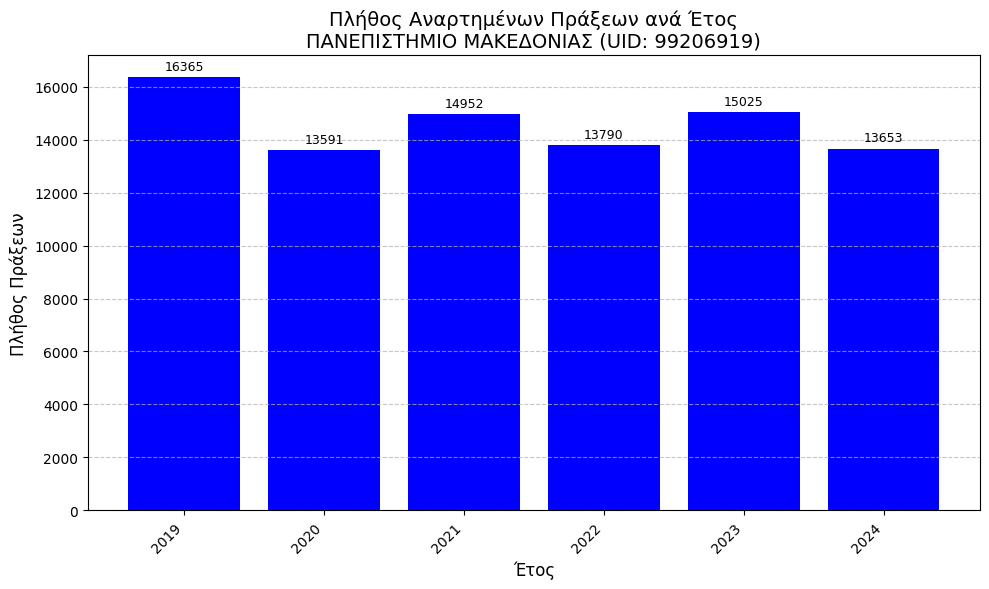

In [3]:
# Ερώτημα 2
results_q2 = {}
print(f"🔍 Αναζήτηση συνολικών πράξεων για τον οργανισμό ΠΑΜΑΚ (UID: {uid})...\n")

for year_val in years_range:
    print(f"  🔄 Επεξεργασία έτους: {year_val}...")
    yearly_total_for_this_year = 0
    error_occurred_this_year = False

    # Καθορισμός των τριών τετραμηνιαίων περιόδων για το τρέχον έτος
    # Περίοδος 1: Μήνες 1-4
    # Περίοδος 2: Μήνες 5-8
    # Περίοδος 3: Μήνες 9-12
    date_periods_q2 = [
        (f"{year_val}-01-01", f"{year_val}-04-30", "1ο τετράμηνο"),
        (f"{year_val}-05-01", f"{year_val}-08-31", "2ο τετράμηνο"),
        (f"{year_val}-09-01", f"{year_val}-12-31", "3ο τετράμηνο")
    ]

    for from_date, to_date, period_label in date_periods_q2:
        # Δεν εμφανίζουμε πλέον το μήνυμα για κάθε τετράμηνο εδώ
        # print(f"    -> Αναζήτηση για {period_label} ({from_date} έως {to_date})...")
        params = {
            "org": uid,
            "from_issue_date": from_date,
            "to_issue_date": to_date,
            "size": 1
        }

        try:
            response = requests.get(base_url, params=params, timeout=45)
            response.raise_for_status()
            data = response.json()

            # (Προαιρετικό αλλά χρήσιμο για debugging αρχικά) Έλεγχος του πραγματικού query
            # actual_query_info = data.get("info", {}).get("query", "N/A")
            # print(f"      DEBUG: {period_label} {year_val} - API Query: {actual_query_info} - Got: {data.get('info', {}).get('total', 0)}")

            sub_total = data.get("info", {}).get("total", 0)
            yearly_total_for_this_year += sub_total
            # Δεν εμφανίζουμε το αποτέλεσμα του τετραμήνου εδώ
            # print(f"    ✅ {period_label}: {sub_total} πράξεις βρέθηκαν.")

        except requests.exceptions.HTTPError as http_err:
            print(f"    ⚠️  Σφάλμα HTTP για {period_label} έτους {year_val}. Η επεξεργασία του έτους θα διακοπεί. Σφάλμα: {http_err}")
            error_occurred_this_year = True
            break
        except requests.exceptions.RequestException as req_err:
            print(f"    ⚠️  Σφάλμα αιτήματος για {period_label} έτους {year_val}. Η επεξεργασία του έτους θα διακοπεί. Σφάλμα: {req_err}")
            error_occurred_this_year = True
            break
        except ValueError as json_err:
            print(f"    ⚠️  Σφάλμα JSON για {period_label} έτους {year_val}. Η επεξεργασία του έτους θα διακοπεί. Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
            error_occurred_this_year = True
            break
        except Exception as e:
            print(f"    ⚠️  Άγνωστο σφάλμα για {period_label} έτους {year_val}. Η επεξεργασία του έτους θα διακοπεί. Σφάλμα: {e}")
            error_occurred_this_year = True
            break

    if error_occurred_this_year:
        results_q2[year_val] = "Σφάλμα/Ελλιπή" # Χρησιμοποιούμε string για να είναι σαφές στον πίνακα
        print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val}.\n")
    else:
        results_q2[year_val] = yearly_total_for_this_year
        print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val}. Σύνολο: {yearly_total_for_this_year}\n")

# Εμφάνιση αποτελεσμάτων σε "όμορφο" πίνακα
print("\n" + "="*40)
print(f"📊 Σύνολο Πράξεων ανά Έτος")
print(f"   Οργανισμός ΠΑΜΑΚ (UID: {uid})")
print("="*40)
print(f"{'Έτος':<6} | {'Πλήθος Πράξεων':<20}")
print("-"*40)
for year_key, count_val in results_q2.items():
    # Εμφάνιση του 'Σφάλμα/Ελλιπή' ή του αριθμού
    display_count = count_val if isinstance(count_val, int) else str(count_val)
    print(f"{year_key:<6} | {display_count:<20}")
print("="*40 + "\n")


# ------- Προσθήκη Ραβδογράμματος (παραμένει ίδιο με πριν, προσαρμογή για το 'Σφάλμα/Ελλιπή') -------
plot_years_list_q2 = []
plot_counts_list_q2 = []

for year_item, count_item in results_q2.items():
    if isinstance(count_item, int): # Συμπεριλαμβάνουμε μόνο έτη χωρίς σφάλματα (δηλαδή με ακέραιο πλήθος)
        plot_years_list_q2.append(str(year_item))
        plot_counts_list_q2.append(count_item)
    else:
        # Προαιρετικά: αν θέλεις να δείξεις τα σφάλματα στο γράφημα με 0 ή να τα παραλείψεις
        # Εδώ τα παραλείπουμε. Αν ήθελες να τα δείξεις με 0:
        # plot_years_list_q2.append(str(year_item))
        # plot_counts_list_q2.append(0) # ή κάποια άλλη τιμή για να φαίνεται το σφάλμα
        print(f"ℹ️ Το έτος {year_item} παραλείπεται από το γράφημα λόγω σφάλματος/ελλιπών δεδομένων.")


if plot_years_list_q2 and plot_counts_list_q2:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(plot_years_list_q2, plot_counts_list_q2, color='blue') # Άλλαξα χρώμα για ποικιλία

    plt.title(f'Πλήθος Αναρτημένων Πράξεων ανά Έτος\nΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: {uid})', fontsize=14)
    plt.xlabel('Έτος', fontsize=12)
    plt.ylabel('Πλήθος Πράξεων', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    ax = plt.gca()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for bar in bars:
        yval = bar.get_height()
        max_val_for_text_offset = max(plot_counts_list_q2) if plot_counts_list_q2 else 1
        if max_val_for_text_offset == 0 : max_val_for_text_offset = 1

        if yval > 0: # Εμφανίζουμε τιμή μόνο αν είναι > 0
             plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * max_val_for_text_offset,
                     f'{int(yval)}', ha='center', va='bottom', fontsize=9)
        # Αν θέλεις να δείχνεις και τα μηδενικά (αν υπάρχουν έγκυρα μηδενικά):
        # elif max_val_for_text_offset == 1 and all(v == 0 for v in plot_counts_list_q2):
        #      plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1,
        #              f'{int(yval)}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()

    graph_filename_total_q2 = f"praxeis_synolikes_q2_{uid}.png"
    plt.savefig(graph_filename_total_q2)
    print(f"\n📈 Το γράφημα των συνολικών πράξεων (Ερώτημα 2) αποθηκεύτηκε ως '{graph_filename_total_q2}'")
else:
    print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα (χωρίς σφάλματα) για τη δημιουργία γραφήματος συνολικών πράξεων (Ερώτημα 2).")

## Ερώτημα 3

### Πόσες από τις πράξεις αυτές έχουν ανακληθεί (ανά έτος);

🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων για τον οργανισμό ΠΑΜΑΚ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019 για ανακλημένες πράξεις. Σύνολο: 0

  🔄 Επεξεργασία έτους: 2020 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020 για ανακλημένες πράξεις. Σύνολο: 0

  🔄 Επεξεργασία έτους: 2021 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021 για ανακλημένες πράξεις. Σύνολο: 1

  🔄 Επεξεργασία έτους: 2022 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022 για ανακλημένες πράξεις. Σύνολο: 4

  🔄 Επεξεργασία έτους: 2023 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2023 για ανακλημένες πράξεις. Σύνολο: 0

  🔄 Επεξεργασία έτους: 2024 για ανακλημένες πράξεις...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2024 για ανακλημένες πράξεις. Σύνολο: 5


📊 Πλήθος ΑΝΑΚΛΗΜΕΝΩΝ Πράξεων ανά Έτος
   Οργανισμός ΠΑΜΑΚ (UID: 99206919)
Έτος   | Πλήθος Ανακλημένων

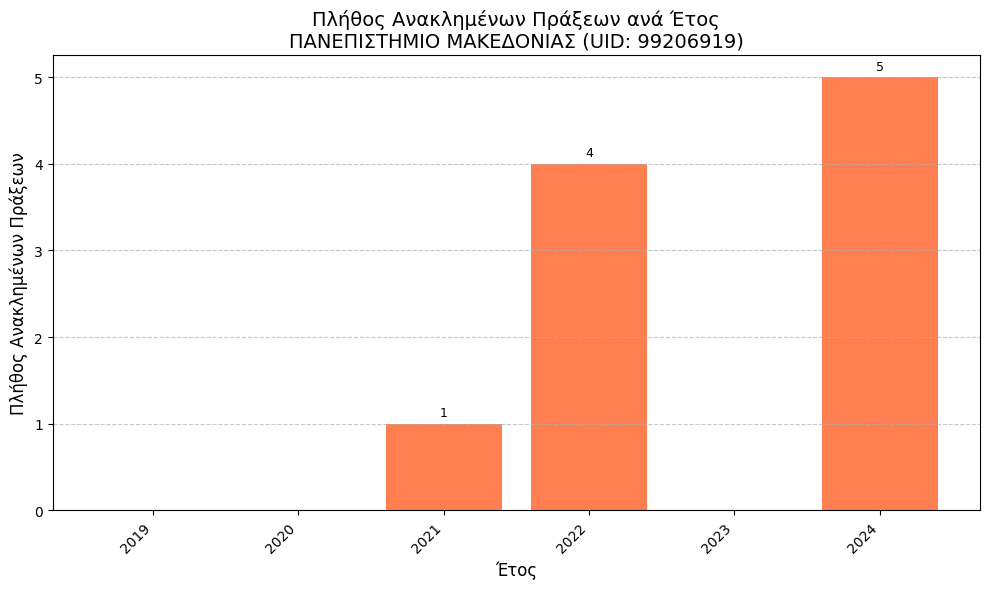

In [4]:
# Ερώτημα 3

results_q3 = {} # Αρχικοποίηση του λεξικού για τα αποτελέσματα του Ερωτήματος 3
# ----------------------------------------------------------

print(f"🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων για τον οργανισμό ΠΑΜΑΚ (UID: {uid})...\n")

for year_val in years_range:
    print(f"  🔄 Επεξεργασία έτους: {year_val} για ανακλημένες πράξεις...")
    yearly_total_revoked_this_year = 0
    error_occurred_this_year_q3 = False

    date_periods_q3 = [
        (f"{year_val}-01-01", f"{year_val}-04-30", "1ο τετράμηνο"),
        (f"{year_val}-05-01", f"{year_val}-08-31", "2ο τετράμηνο"),
        (f"{year_val}-09-01", f"{year_val}-12-31", "3ο τετράμηνο")
    ]

    for from_date, to_date, period_label in date_periods_q3:
        params = {
            "org": uid,
            "from_issue_date": from_date,
            "to_issue_date": to_date,
            "status": "revoked",  # <--- ΚΡΙΣΙΜΗ ΠΑΡΑΜΕΤΡΟΣ ΓΙΑ ΤΟ ΕΡΩΤΗΜΑ 3
            "size": 1
        }

        try:
            response = requests.get(base_url, params=params, timeout=45)
            response.raise_for_status()
            data = response.json()

            # (Προαιρετικό αλλά χρήσιμο για debugging αρχικά) Έλεγχος του πραγματικού query
            # actual_query_info_q3 = data.get("info", {}).get("query", "N/A")
            # print(f"      DEBUG Q3: {period_label} {year_val} - API Query: {actual_query_info_q3} - Got: {data.get('info', {}).get('total', 0)}")

            sub_total_revoked = data.get("info", {}).get("total", 0)
            yearly_total_revoked_this_year += sub_total_revoked

        except requests.exceptions.HTTPError as http_err:
            print(f"    ⚠️  Σφάλμα HTTP για {period_label} έτους {year_val} (ανακλημένες). Διακοπή για το έτος. Σφάλμα: {http_err}")
            error_occurred_this_year_q3 = True
            break
        except requests.exceptions.RequestException as req_err:
            print(f"    ⚠️  Σφάλμα αιτήματος για {period_label} έτους {year_val} (ανακλημένες). Διακοπή για το έτος. Σφάλμα: {req_err}")
            error_occurred_this_year_q3 = True
            break
        except ValueError as json_err:
            print(f"    ⚠️  Σφάλμα JSON για {period_label} έτους {year_val} (ανακλημένες). Διακοπή για το έτος. Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
            error_occurred_this_year_q3 = True
            break
        except Exception as e:
            print(f"    ⚠️  Άγνωστο σφάλμα για {period_label} έτους {year_val} (ανακλημένες). Διακοπή για το έτος. Σφάλμα: {e}")
            error_occurred_this_year_q3 = True
            break

    if error_occurred_this_year_q3:
        results_q3[year_val] = "Σφάλμα/Ελλιπή"
        print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val} για ανακλημένες πράξεις.\n")
    else:
        results_q3[year_val] = yearly_total_revoked_this_year
        print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val} για ανακλημένες πράξεις. Σύνολο: {yearly_total_revoked_this_year}\n")

# Εμφάνιση αποτελεσμάτων για τις ανακλημένες πράξεις σε "όμορφο" πίνακα
print("\n" + "="*50)
print(f"📊 Πλήθος ΑΝΑΚΛΗΜΕΝΩΝ Πράξεων ανά Έτος")
print(f"   Οργανισμός ΠΑΜΑΚ (UID: {uid})")
print("="*50)
print(f"{'Έτος':<6} | {'Πλήθος Ανακλημένων Πράξεων':<30}")
print("-"*50)
for year_key, count_val in results_q3.items():
    display_count_q3 = count_val if isinstance(count_val, int) else str(count_val)
    print(f"{year_key:<6} | {display_count_q3:<30}")
print("="*50 + "\n")

# ------- Προσθήκη Γραφήματος για τις ΑΝΑΚΛΗΜΕΝΕΣ πράξεις -------
plot_revoked_years_list_q3 = []
plot_revoked_counts_list_q3 = []

for year_item, count_item in results_q3.items():
    if isinstance(count_item, int):
        plot_revoked_years_list_q3.append(str(year_item))
        plot_revoked_counts_list_q3.append(count_item)
    else:
        print(f"ℹ️ [Ερώτημα 3] Το έτος {year_item} παραλείπεται από το γράφημα ανακλημένων πράξεων λόγω σφάλματος/ελλιπών δεδομένων.")


if plot_revoked_years_list_q3 and plot_revoked_counts_list_q3:
    plt.figure(figsize=(10, 6))
    bars_q3 = plt.bar(plot_revoked_years_list_q3, plot_revoked_counts_list_q3, color='coral')

    plt.title(f'Πλήθος Ανακλημένων Πράξεων ανά Έτος\nΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: {uid})', fontsize=14)
    plt.xlabel('Έτος', fontsize=12)
    plt.ylabel('Πλήθος Ανακλημένων Πράξεων', fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    ax_q3 = plt.gca()
    ax_q3.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for bar in bars_q3:
        yval = bar.get_height()
        max_val_for_text_offset_q3 = max(plot_revoked_counts_list_q3) if plot_revoked_counts_list_q3 else 1
        if max_val_for_text_offset_q3 == 0 : max_val_for_text_offset_q3 = 1

        if yval > 0:
             plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * max_val_for_text_offset_q3,
                     f'{int(yval)}', ha='center', va='bottom', fontsize=9)
        # Προαιρετικά, για εμφάνιση των μηδενικών αν υπάρχουν έγκυρα
        # elif max_val_for_text_offset_q3 == 1 and all(v == 0 for v in plot_revoked_counts_list_q3):
        #      plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1,
        #              f'{int(yval)}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    graph_filename_revoked_q3 = f"praxeis_anaklimenes_q3_{uid}.png"
    plt.savefig(graph_filename_revoked_q3)
    print(f"\n📈 Το γράφημα των ανακλημένων πράξεων (Ερώτημα 3) αποθηκεύτηκε ως '{graph_filename_revoked_q3}'")
else:
    print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα (χωρίς σφάλματα) για τη δημιουργία γραφήματος ανακλημένων πράξεων (Ερώτημα 3).")

## Ερώτημα 4

### Πόσες από τις πράξεις που έχουν ανακληθεί περιέχουν προσωπικά δεδομένα;

🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ για τον οργανισμό ΠΑΜΑΚ (UID: 99206919)...

  🔄 Επεξεργασία έτους: 2019 για ανακλημένες πράξεις με προσωπικά δεδομένα...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2019 για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: 0

  🔄 Επεξεργασία έτους: 2020 για ανακλημένες πράξεις με προσωπικά δεδομένα...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2020 για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: 0

  🔄 Επεξεργασία έτους: 2021 για ανακλημένες πράξεις με προσωπικά δεδομένα...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2021 για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: 1

  🔄 Επεξεργασία έτους: 2022 για ανακλημένες πράξεις με προσωπικά δεδομένα...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2022 για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: 4

  🔄 Επεξεργασία έτους: 2023 για ανακλημένες πράξεις με προσωπικά δεδομένα...
  ✅ Ολοκληρώθηκε η επεξεργασία του έτους 2023 για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: 

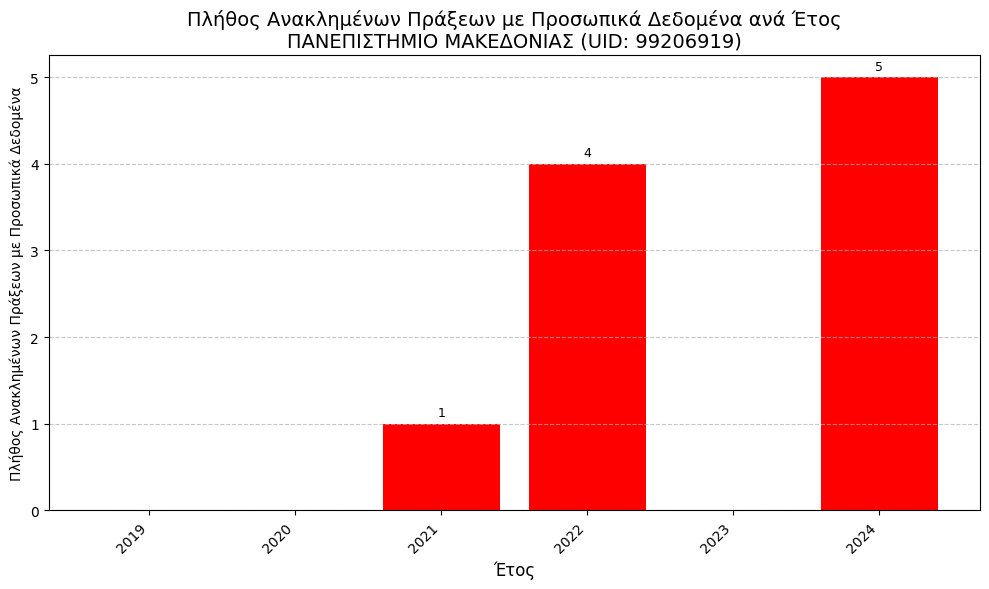

In [6]:
# Ερώτημα 4


results_q4 = {} # Αρχικοποίηση του λεξικού για τα αποτελέσματα του Ερωτήματος 4
# ----------------------------------------------------------

print(f"🔍 Αναζήτηση ΑΝΑΚΛΗΜΕΝΩΝ πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ για τον οργανισμό ΠΑΜΑΚ (UID: {uid})...\n")

for year_val in years_range:
    print(f"  🔄 Επεξεργασία έτους: {year_val} για ανακλημένες πράξεις με προσωπικά δεδομένα...")
    yearly_total_revoked_pd_this_year = 0 # pd = personal data
    error_occurred_this_year_q4 = False

    date_periods_q4 = [
        (f"{year_val}-01-01", f"{year_val}-04-30", "1ο τετράμηνο"),
        (f"{year_val}-05-01", f"{year_val}-08-31", "2ο τετράμηνο"),
        (f"{year_val}-09-01", f"{year_val}-12-31", "3ο τετράμηνο")
    ]

    for from_date, to_date, period_label in date_periods_q4:
        params = {
            "org": uid,
            "from_issue_date": from_date,
            "to_issue_date": to_date,
            "status": "revoked",
            "privateData": "true",  # <--- Η ΣΗΜΑΝΤΙΚΗ ΠΡΟΣΘΗΚΗ ΓΙΑ ΤΟ ΕΡΩΤΗΜΑ 4
            "size": 1
        }

        try:
            response = requests.get(base_url, params=params, timeout=45)
            response.raise_for_status()
            data = response.json()

            # (Προαιρετικό αλλά χρήσιμο για debugging αρχικά)
            # actual_query_info_q4 = data.get("info", {}).get("query", "N/A")
            # print(f"      DEBUG Q4: {period_label} {year_val} - API Query: {actual_query_info_q4} - Got: {data.get('info', {}).get('total', 0)}")

            sub_total_revoked_pd = data.get("info", {}).get("total", 0)
            yearly_total_revoked_pd_this_year += sub_total_revoked_pd

        except requests.exceptions.HTTPError as http_err:
            print(f"    ⚠️  Σφάλμα HTTP για {period_label} έτους {year_val} (ανακλ. με προσ. δεδ.). Διακοπή για το έτος. Σφάλμα: {http_err}")
            error_occurred_this_year_q4 = True
            break
        except requests.exceptions.RequestException as req_err:
            print(f"    ⚠️  Σφάλμα αιτήματος για {period_label} έτους {year_val} (ανακλ. με προσ. δεδ.). Διακοπή για το έτος. Σφάλμα: {req_err}")
            error_occurred_this_year_q4 = True
            break
        except ValueError as json_err:
            print(f"    ⚠️  Σφάλμα JSON για {period_label} έτους {year_val} (ανακλ. με προσ. δεδ.). Διακοπή για το έτος. Σφάλμα: {json_err} (Απάντηση: {response.text[:100]})")
            error_occurred_this_year_q4 = True
            break
        except Exception as e:
            print(f"    ⚠️  Άγνωστο σφάλμα για {period_label} έτους {year_val} (ανακλ. με προσ. δεδ.). Διακοπή για το έτος. Σφάλμα: {e}")
            error_occurred_this_year_q4 = True
            break

    if error_occurred_this_year_q4:
        results_q4[year_val] = "Σφάλμα/Ελλιπή"
        print(f"  ❌ Ολοκληρώθηκε με σφάλματα η επεξεργασία του έτους {year_val} για ανακλημένες πράξεις με προσωπικά δεδομένα.\n")
    else:
        results_q4[year_val] = yearly_total_revoked_pd_this_year
        print(f"  ✅ Ολοκληρώθηκε η επεξεργασία του έτους {year_val} για ανακλημένες πράξεις με προσωπικά δεδομένα. Σύνολο: {yearly_total_revoked_pd_this_year}\n")

# Εμφάνιση αποτελεσμάτων για τις ανακλημένες πράξεις με προσωπικά δεδομένα σε "όμορφο" πίνακα
print("\n" + "="*70)
print(f"📊 Πλήθος ΑΝΑΚΛΗΜΕΝΩΝ Πράξεων ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ ανά Έτος")
print(f"   Οργανισμός ΠΑΜΑΚ (UID: {uid})")
print("="*70)
print(f"{'Έτος':<6} | {'Πλήθος Ανακλημένων Πράξεων με Προσωπικά Δεδομένα':<50}")
print("-"*70)
for year_key, count_val in results_q4.items():
    display_count_q4 = count_val if isinstance(count_val, int) else str(count_val)
    print(f"{year_key:<6} | {display_count_q4:<50}")
print("="*70 + "\n")

# ------- Προσθήκη Γραφήματος για τις ΑΝΑΚΛΗΜΕΝΕΣ πράξεις ΜΕ ΠΡΟΣΩΠΙΚΑ ΔΕΔΟΜΕΝΑ -------
plot_revoked_pd_years_list_q4 = []
plot_revoked_pd_counts_list_q4 = []

for year_item, count_item in results_q4.items():
    if isinstance(count_item, int):
        plot_revoked_pd_years_list_q4.append(str(year_item))
        plot_revoked_pd_counts_list_q4.append(count_item)
    else:
        print(f"ℹ️ [Ερώτημα 4] Το έτος {year_item} παραλείπεται από το γράφημα (ανακλ. με προσ. δεδομένα) λόγω σφάλματος/ελλιπών δεδομένων.")

if plot_revoked_pd_years_list_q4 and plot_revoked_pd_counts_list_q4:
    plt.figure(figsize=(10, 6))
    bars_q4 = plt.bar(plot_revoked_pd_years_list_q4, plot_revoked_pd_counts_list_q4, color='red')

    plt.title(f'Πλήθος Ανακλημένων Πράξεων με Προσωπικά Δεδομένα ανά Έτος\nΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: {uid})', fontsize=14)
    plt.xlabel('Έτος', fontsize=12)
    plt.ylabel('Πλήθος Ανακλημένων Πράξεων με Προσωπικά Δεδομένα', fontsize=10) # Μικρότερο μέγεθος για να χωράει καλύτερα
    plt.xticks(rotation=45, ha="right")
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    ax_q4 = plt.gca()
    ax_q4.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for bar in bars_q4:
        yval = bar.get_height()
        max_val_for_text_offset_q4 = max(plot_revoked_pd_counts_list_q4) if plot_revoked_pd_counts_list_q4 else 1
        if max_val_for_text_offset_q4 == 0 : max_val_for_text_offset_q4 = 1

        if yval > 0:
             plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * max_val_for_text_offset_q4,
                     f'{int(yval)}', ha='center', va='bottom', fontsize=9)
        # elif max_val_for_text_offset_q4 == 1 and all(v == 0 for v in plot_revoked_pd_counts_list_q4):
        #      plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1,
        #              f'{int(yval)}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    graph_filename_revoked_pd_q4 = f"praxeis_anaklimenes_proswpika_dedomena_q4_{uid}.png"
    plt.savefig(graph_filename_revoked_pd_q4)
    print(f"\n📈 Το γράφημα των ανακλημένων πράξεων με προσωπικά δεδομένα (Ερώτημα 4) αποθηκεύτηκε ως '{graph_filename_revoked_pd_q4}'")
else:
    print("\n🚫 Δεν υπάρχουν επαρκή δεδομένα (χωρίς σφάλματα) για τη δημιουργία γραφήματος ανακλημένων πράξεων με προσωπικά δεδομένα (Ερώτημα 4).")

## Ερώτημα 5

### Οργανωτικές μονάδες του ΠΑΜΑΚ.

In [3]:
# Ερώτημα 5

organization_name = "ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ" # Για να το εμφανίζουμε όμορφα

# Endpoint για τις οργανωτικές μονάδες ενός φορέα
units_url = f"https://diavgeia.gov.gr/opendata/organizations/{uid}/units.json"

active_organizational_units = []
total_units_count_from_api = 0
active_units_count = 0

print(f"🔍 Ανάκτηση ενεργών οργανωτικών μονάδων για {organization_name} (UID: {uid})...\n")

params = {
    "status": "active" # Ζητάμε απευθείας μόνο τις ενεργές
}

try:
    response = requests.get(units_url, params=params, timeout=30)
    response.raise_for_status() # Έλεγχος για HTTP errors

    data = response.json()
    units_data = data.get("units", []) # Η τεκμηρίωση δείχνει "units" ως το κύριο κλειδί

    if not units_data:
        print(f"ℹ️ Δεν βρέθηκαν οργανωτικές μονάδες για τον φορέα (βάσει API response).")
    else:
        # Το API επιστρέφει απευθείας τις ενεργές μονάδες με το status=active.
        # Επαληθεύουμε παρόλα αυτά αν υπάρχει το πεδίο "active": true για κάθε μονάδα
        for unit in units_data:
            if unit.get("active") is True: # Ρητός έλεγχος, αν και το API θα έπρεπε να επιστρέφει μόνο ενεργές
                active_organizational_units.append({
                    "uid": unit.get("uid"),
                    "label": unit.get("label"),
                    "category": unit.get("category") # Προσθήκη και κατηγορίας αν υπάρχει
                })
                active_units_count += 1

        # Το API δεν επιστρέφει 'info' block σε αυτό το endpoint για το συνολικό πλήθος,
        # οπότε ο αριθμός των εγγραφών στη λίστα 'units' είναι το σύνολο που λάβαμε.
        total_units_count_from_api = len(units_data)

        print(f"✅ Συνολικά ενεργές οργανωτικές μονάδες που ανακτήθηκαν: {active_units_count}")
        if total_units_count_from_api != active_units_count:
            print(f"   (Σημείωση: Το API επέστρεψε {total_units_count_from_api} μονάδες με status=active, όλες επαληθεύτηκαν ως ενεργές.)")


except requests.exceptions.HTTPError as http_err:
    print(f"❌ HTTP σφάλμα κατά την ανάκτηση οργανωτικών μονάδων: {http_err}")
except requests.exceptions.RequestException as req_err:
    print(f"❌ Σφάλμα αιτήματος κατά την ανάκτηση οργανωτικών μονάδων: {req_err}")
except ValueError as json_err:
    print(f"⚠️ Σφάλμα JSON κατά την ανάκτηση οργανωτικών μονάδων: {json_err} (Απάντηση: {response.text[:200]})")
except Exception as e:
    print(f"⚠️ Άγνωστο σφάλμα κατά την ανάκτηση οργανωτικών μονάδων: {e}")

# Εμφάνιση αποτελεσμάτων
print(f"\n🏢 Ενεργές Οργανωτικές Μονάδες για το {organization_name}:")
if active_organizational_units:
    print(f"Συνολικό Πλήθος Ενεργών Μονάδων: {active_units_count}")
    print("-" * 40)
    for i, unit in enumerate(active_organizational_units, 1):
        print(f"{i}. Ονομασία: {unit['label']} (UID: {unit['uid']})")
        if unit['category']:
             print(f"   Κατηγορία: {unit['category']}")
else:
    if active_units_count == 0 and total_units_count_from_api == 0 : #Μόνο αν δεν υπήρξε σφάλμα πιο πάνω
        print("Δεν βρέθηκαν ενεργές οργανωτικές μονάδες για αυτό το ΑΕΙ στη Δι@ύγεια.")
    elif active_units_count == 0 and total_units_count_from_api > 0 :
        print("Δεν βρέθηκαν μονάδες με 'active: true' στην απάντηση, αν και το API επέστρεψε μονάδες με status=active.")
    else: # Αν συνέβη κάποιο σφάλμα πιο πάνω
        print("Δεν ήταν δυνατή η ανάκτηση των οργανωτικών μονάδων.")

# Δεν θα φτιάξουμε γράφημα για λίστα ονομάτων,
# αλλά το συνολικό πλήθος είναι σημαντικό για την παρουσίαση.
# Ένα πινακάκι στην παρουσίαση με το όνομα του ΑΕΙ και το πλήθος των μονάδων θα ήταν καλό.

🔍 Ανάκτηση ενεργών οργανωτικών μονάδων για ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ (UID: 99206919)...

✅ Συνολικά ενεργές οργανωτικές μονάδες που ανακτήθηκαν: 64

🏢 Ενεργές Οργανωτικές Μονάδες για το ΠΑΝΕΠΙΣΤΗΜΙΟ ΜΑΚΕΔΟΝΙΑΣ:
Συνολικό Πλήθος Ενεργών Μονάδων: 64
----------------------------------------
1. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΑΚΑΔΗΜΑΙΚΩΝ, ΔΙΟΙΚΗΤΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΠΡΟΣΩΠΙΚΟΥ (UID: 100095134)
   Κατηγορία: ORG_UNIT_OTHER
2. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΟΙΚΟΝΟΜΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΥΠΟΔΟΜΩΝ (UID: 100081653)
   Κατηγορία: ORG_UNIT_OTHER
3. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΟΙΚΟΝΟΜΙΚΩΝ ΥΠΟΘΕΣΕΩΝ ΚΑΙ ΥΠΟΔΟΜΩΝ (UID: 100094234)
   Κατηγορία: ORG_UNIT_OTHER
4. Ονομασία: ΑΝΤΙΠΡΥΤΑΝΗΣ ΦΟΙΤΗΤΙΚΗΣ ΜΕΡΙΜΝΑΣ ΚΑΙ ΔΙΑ ΒΙΟΥ ΜΑΘΗΣΗΣ (UID: 100081655)
   Κατηγορία: ORG_UNIT_OTHER
5. Ονομασία: ΓΡΑΦΕΙΟ ΔΙΑΣΥΝΔΕΣΗΣ (UID: 86041)
   Κατηγορία: OFFICE
6. Ονομασία: Δ.Π.Μ.Σ. ΑΝΘΡΩΠΙΝΑ ΔΙΚΑΙΩΜΑΤΑ ΚΑΙ ΜΕΤΑΝΑΣΤΕΥΤΙΚΕΣ ΣΠΟΥΔΕΣ (UID: 100092650)
   Κατηγορία: ORG_UNIT_OTHER
7. Ονομασία: ΔΙΑΤΜΗΜΑΤΙΚΟ ΠΡΟΓΡΑΜΜΑ ΜΕΤΑΠΤΥΧΙΑΚΩΝ ΣΠΟΥΔΩΝ ΣΤΑ ΠΛΗΡΟΦΟΡΙΑΚΑ ΣΥΣΤΗΜ